In [1]:
from google.colab import files
upload = files.upload()

Saving California_Houses.csv to California_Houses.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd
#load datafrane from a CSV file
df = pd.read_csv('California_Houses.csv')
df.fillna(df.mean(), inplace=True)

In [4]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [5]:
from sklearn.preprocessing import StandardScaler
# List of numerical columns to normalize
numerical_features = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms',
                      'Population', 'Households', 'Distance_to_coast', 'Distance_to_LA',
                      'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [6]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,2.344766,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,37.88,-122.23,-0.635876,1.158969,1.165668,-1.297546,-1.461074
1,358500.0,2.332238,-0.607019,2.045890,1.348649,0.861439,1.669961,37.86,-122.22,-0.616285,1.149889,1.157842,-1.308518,-1.462552
2,352100.0,1.782699,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,37.85,-122.24,-0.656307,1.151224,1.158840,-1.309359,-1.470824
3,341300.0,0.932968,1.856182,-0.624215,-0.719067,-0.766028,-0.733781,37.85,-122.25,-0.666299,1.153580,1.160808,-1.307426,-1.473945
4,342200.0,-0.012881,1.856182,-0.462404,-0.612239,-0.759847,-0.629157,37.85,-122.25,-0.666299,1.153580,1.160808,-1.307426,-1.473945


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Creating New Features
df['Rooms_per_Household'] = df['Tot_Rooms'] / df['Households']
df['Bedrooms_per_Room'] = df['Tot_Bedrooms'] / df['Tot_Rooms']
df['Population_per_Household'] = df['Population'] / df['Households']

In [9]:
# Transforming Features
df['Log_Median_Income'] = np.log1p(df['Median_Income'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


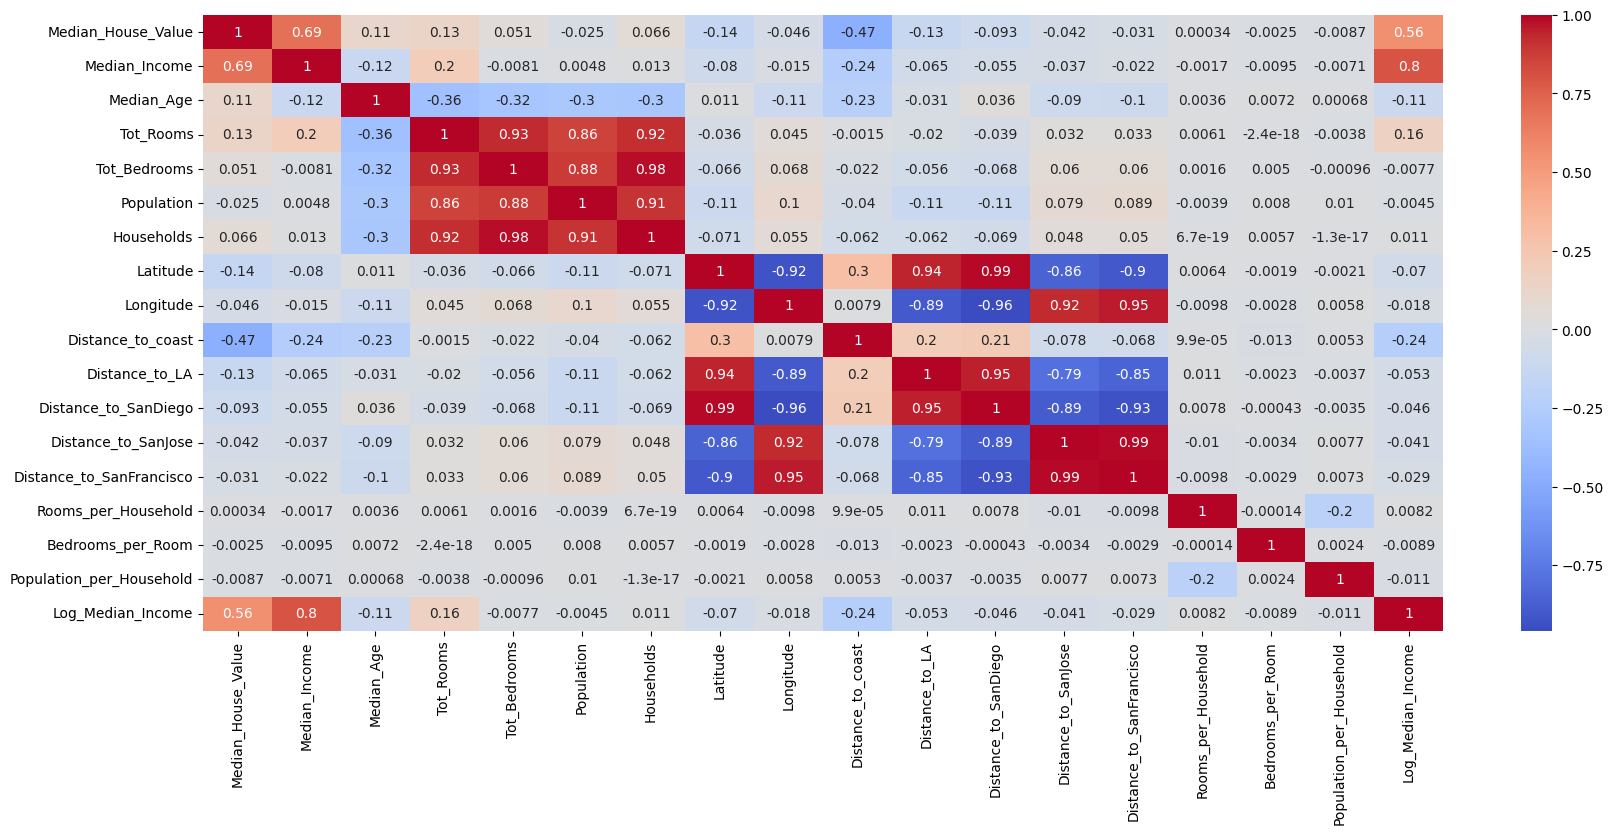

In [10]:
#  Feature Selection
# Inspecting the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
df = df.drop(columns=['Tot_Rooms'])  # dropping 'Tot_Rooms'

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('California_Houses.csv')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define features and target variable
X = df_imputed.drop(columns=['Median_House_Value'])
y = df_imputed['Median_House_Value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 4809839606.897536
R-squared: 0.6329512627916902


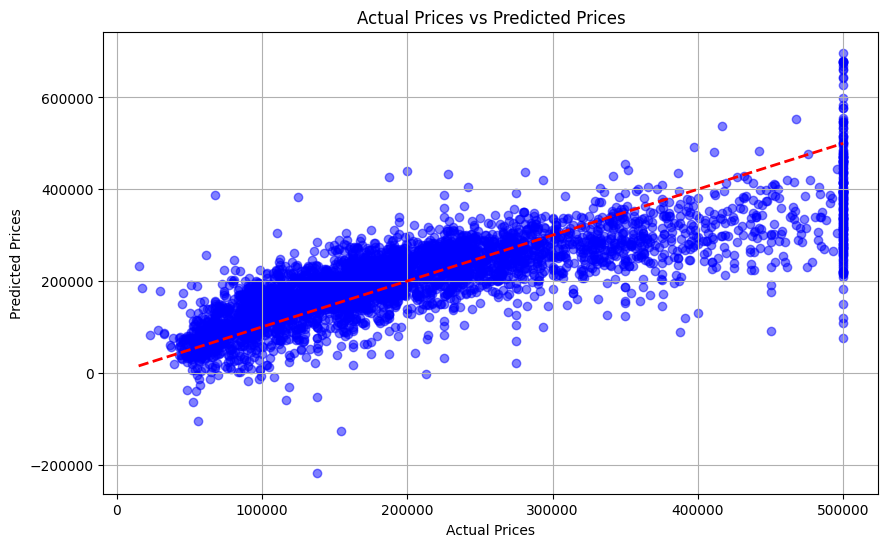

In [14]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined and contain the actual prices and predicted prices respectively

# Plotting predictions against actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()